In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('display.max_columns', None)

In [36]:
## TEMPERATURE
## 2016-2017
temp1=pd.read_csv('data/Temp_2016_2017.csv', encoding='windows-1252', sep=';', header=4)
## 2018-2019
temp2=pd.read_csv('data/TEMP_2018_2019.csv', encoding='windows-1252', sep=';', header=4)
## 2020-2021
temp3=pd.read_csv('data/TEMP_2020_2021.csv', encoding='windows-1252', sep=';', header=5)

## PRECIPITATION
## 2016-2017
prec1=pd.read_csv('data/PREC_2016_2017.csv', encoding='windows-1252', sep=';', header=4)
## 2018-2019
prec2=pd.read_csv('data/PREC_2018_2020.csv', encoding='windows-1252', sep=';', header=4)
## 2020-2021
prec3=pd.read_csv('data/PREC_2020_2021.csv', encoding='windows-1252', sep=';', header=5)

## PM2.5
## 2016-2017
PM1=pd.read_csv('data/PM25_2016_2017.csv', encoding='windows-1252', sep=';', header=4)
## 2018-2019
PM2=pd.read_csv('data/PM25_2018_2019.csv', encoding='windows-1252', sep=';', header=4)
## 2020-2021
PM3=pd.read_csv('data/PM25_2020_2021.csv', encoding='windows-1252', sep=';', header=5)



In [3]:
## Renaming columns
new_columns_name=['date','bern','lausanne','lugano','zurich','basel','dubendorf','harkingen','sion','magadino','payerne',
                  'tanikon','beromunster','rigi','jungfraujoch']
temp1.columns=new_columns_name
temp2.columns=new_columns_name
temp3.columns=new_columns_name
prec1.columns=new_columns_name
prec2.columns=new_columns_name
prec3.columns=new_columns_name
PM1.columns=new_columns_name
PM2.columns=new_columns_name
PM3.columns=new_columns_name


In [4]:
## Setting up data format
temp1['date']=pd.to_datetime(temp1['date'], format='%d.%m.%Y', errors='ignore')
temp2['date']=pd.to_datetime(temp2['date'], format='%d.%m.%Y', errors='ignore')
temp3['date']=pd.to_datetime(temp3['date'], format='%d.%m.%Y', errors='ignore')
prec1['date']=pd.to_datetime(prec1['date'], format='%d.%m.%Y', errors='ignore')
prec2['date']=pd.to_datetime(prec2['date'], format='%d.%m.%Y', errors='ignore')
prec3['date']=pd.to_datetime(prec3['date'], format='%d.%m.%Y', errors='ignore')
PM1['date']=pd.to_datetime(PM1['date'], format='%d.%m.%Y', errors='ignore')
PM2['date']=pd.to_datetime(PM2['date'], format='%d.%m.%Y', errors='ignore')
PM3['date']=pd.to_datetime(PM3['date'], format='%d.%m.%Y', errors='ignore')


Train data 2016-2019

In [5]:
## connecting 2016-2019 data
temp_16_19 =pd.concat([temp1, temp2], axis=0)
prec_16_19 = pd.concat([prec1, prec2], axis=0)
PM_16_19 = pd.concat([PM1, PM2], axis=0)

## Set index to date
temp_16_19.set_index("date", inplace=True)
prec_16_19.set_index("date", inplace=True)
PM_16_19.set_index("date", inplace=True)


In [6]:
## 2016 and 2020 are leap years-> Feb has 29 days, We also dont have all data for dec 2021 ( not over yet )
temp_16_19_Monthly=temp_16_19.resample('M').mean()
prece_16_19_Monthly=prec_16_19.resample('M').mean()
PM_16_19_Monthly=prec_16_19.resample('M').sum()

In [7]:
## Dictionery of all stations 2016-2019 data
d = {}
for name in new_columns_name[1:]:
    d[name] = pd.concat([temp_16_19_Monthly.loc[:,name].rename("temp"),
                  prece_16_19_Monthly.loc[:,name].rename("precipitation"),
                  PM_16_19_Monthly.loc[:,name].rename("PM25") ],
                 axis=1, join="inner")


In [8]:
d["beromunster"]

,temp,precipitation,PM25
date,,,
2016-01-31,NaN,NaN,0.0
2016-02-29,NaN,NaN,0.0
2016-03-31,NaN,NaN,0.0
2016-04-30,NaN,NaN,0.0
2016-05-31,NaN,NaN,0.0
2016-06-30,NaN,NaN,0.0
2016-07-31,NaN,NaN,0.0
2016-08-31,NaN,NaN,0.0
2016-09-30,NaN,NaN,0.0


In [9]:
## split to train and test data for validation 2016-2018 predict 2019
d_train = {}
d_test = {}
for key, value in d.items():
    d_train[key] = value[value.index.year.isin([2016,2017, 2018])]
    d_test[key] = value[value.index.year.isin([2019])]


beromunster station has no data for 2016  
jungfraujoch station has no data at all (2016-2019)

Data to predict on 2020-2021

In [10]:
## 2020_2021
## Set index to date
temp3.set_index("date", inplace=True)
prec3.set_index("date", inplace=True)
PM3.set_index("date", inplace=True)

In [11]:
## Resample by month
temp3_Monthly=temp3.resample('M').mean()
prece3_Monthly=prec3.resample('M').mean()
PM3_Monthly=prec3.resample('M').sum()

In [12]:
## Dictionery of all stations data from 2020_2021
d_2020_2021 = {}
for name in new_columns_name[1:]:
    d_2020_2021[name] = pd.concat([temp3_Monthly.loc[:,name].rename("temp"),
                  prece3_Monthly.loc[:,name].rename("precipitation"),
                  PM3_Monthly.loc[:,name].rename("PM25") ],
                 axis=1, join="inner")


In [13]:
d_2020_2021["beromunster"]

,temp,precipitation,PM25
date,,,
2020-01-31,1.837931,0.431034,12.5
2020-02-29,4.803571,2.050000,57.4
2020-03-31,4.451613,1.422581,44.1
2020-04-30,11.640000,1.316667,39.5
2020-05-31,12.409677,3.074194,95.3
2020-06-30,14.983333,5.796667,173.9
2020-07-31,18.812903,2.406452,74.6
2020-08-31,18.612903,6.243333,187.3
2020-09-30,15.033333,1.389655,40.3


Dropping missing values

In [14]:
## Drop na rows from training data
d_train["beromunster"] = d_train["beromunster"][d_train["beromunster"]["temp"].notna()]
d["beromunster"] = d["beromunster"][d["beromunster"]["temp"].notna()]

In [15]:
del d["jungfraujoch"]
del d_train["jungfraujoch"]
del d_2020_2021["jungfraujoch"]

Prediction

In [16]:
from sklearn.linear_model import LinearRegression
## fit and predit 2019 values for each station (d_train- data from 2016-2018, d_test- data from 2019)
pred_2019 = {}
for key, value in d_train.items():
    linear = LinearRegression()
    linear.fit(value["precipitation"].values.reshape(-1,1),value["PM25"])
    #5 Predicting a new result
    linear_pred = linear.predict(d_test[key].precipitation.values.reshape(-1,1))
    pred_2019[key] = linear_pred
    

In [17]:
## fit and predit 2020 and 2021 values for each station
pred_2020_2021 = {}
for key, value in d.items():
    linear = LinearRegression()
    linear.fit(value["precipitation"].values.reshape(-1,1),value["PM25"])
    #5 Predicting a new result
    linear_pred = linear.predict(d_2020_2021[key].precipitation.values.reshape(-1,1))
    pred_2020_2021[key] = linear_pred
    

In [18]:
diff = {}
for key in d.keys():
    diff[key]= pred_2020_2021[key]- d_2020_2021[key]["PM25"]

In [19]:
diff

{'bern': date
 2020-01-31    -2.598710
 2020-02-29     4.384494
 2020-03-31    -2.611372
 2020-04-30    -0.461344
 2020-05-31    -2.630857
 2020-06-30     6.551825
 2020-07-31    -2.624791
 2020-08-31    -2.680289
 2020-09-30     3.123625
 2020-10-31    -2.663610
 2020-11-30    -1.418311
 2020-12-31    -2.627142
 2021-01-31    -2.666263
 2021-02-28     1.961205
 2021-03-31    -2.615239
 2021-04-30    -1.196972
 2021-05-31    -2.670281
 2021-06-30     3.858027
 2021-07-31    -2.744809
 2021-08-31    -2.628734
 2021-09-30    -1.118852
 2021-10-31    -2.586277
 2021-11-30    -1.633140
 2021-12-31    26.075863
 Freq: M, Name: PM25, dtype: float64,
 'lausanne': date
 2020-01-31    -1.478394
 2020-02-29     6.948758
 2020-03-31    -1.549882
 2020-04-30     0.057186
 2020-05-31    -1.524829
 2020-06-30     3.767434
 2020-07-31    -1.476160
 2020-08-31    -1.674347
 2020-09-30     0.760581
 2020-10-31     3.697728
 2020-11-30     0.508656
 2020-12-31    -1.610040
 2021-01-31    -1.634774
 2021

In [20]:
## transpose all tables
diff_transpose = {}
col_names = [str(i) for i in range(1,25)]
diff_con = pd.DataFrame(columns=col_names)
for key, value in diff.items():
    #print(pd.DataFrame(value).reset_index().transpose())
    diff_transpose[key]= pd.DataFrame(value).reset_index().transpose()
    diff_transpose[key].columns =  col_names
    diff_transpose[key] =  diff_transpose[key].rename({"PM25": str(key)}, axis='index')
    diff_transpose[key].drop("date", axis=0, inplace=True)
    diff_con = pd.concat([diff_con, diff_transpose[key]], axis=0)

In [21]:
diff_con

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
bern,-2.59871,4.384494,-2.611372,-0.461344,-2.630857,6.551825,-2.624791,-2.680289,3.123625,-2.66361,-1.418311,-2.627142,-2.666263,1.961205,-2.615239,-1.196972,-2.670281,3.858027,-2.744809,-2.628734,-1.118852,-2.586277,-1.63314,26.075863
lausanne,-1.478394,6.948758,-1.549882,0.057186,-1.524829,3.767434,-1.47616,-1.674347,0.760581,3.697728,0.508656,-1.61004,-1.634774,8.918777,-1.493554,-0.110741,-1.671156,3.799118,-1.799132,-1.553393,0.145903,-1.507277,2.055631,43.968462
lugano,0.188183,0.339288,-1.595079,1.555459,-4.146639,3.955328,-0.656946,-3.748337,1.856531,-5.517445,0.33624,-3.01441,-1.961032,5.980206,0.169986,1.188449,-2.945667,0.893597,-5.567991,-3.724075,2.642802,-2.379552,2.150139,7.685072
zurich,-1.728977,6.228384,-2.01061,-0.827129,-2.260264,1.55129,-1.998231,-2.875113,-0.58906,-2.531581,-1.071999,-2.328351,-3.307364,3.031382,-1.966251,-0.627605,-2.877176,1.55129,-3.65399,-2.279865,-0.913287,-1.626846,-0.663882,30.234341
basel,-0.539218,3.585153,-0.911726,0.006364,-1.218986,1.323525,-0.409908,-1.80622,0.727115,-1.608103,-0.044215,-1.172719,-1.633016,3.181844,-0.975788,0.375169,-1.907059,2.307708,-2.489547,-1.067136,0.592237,-0.763435,0.484757,16.960238
dubendorf,-1.069326,6.250059,0.305413,-0.116247,-1.705426,2.403011,-1.527641,-2.371542,0.069969,-1.960559,-0.373095,-1.705426,-2.730574,3.650362,0.468084,-0.062737,2.358062,2.848215,-3.393226,-1.628078,0.938645,-0.967735,-0.013507,24.392296
harkingen,-1.557578,6.714648,-2.048246,-0.232451,-2.19625,1.022441,-0.469728,-2.744833,3.251331,-2.614525,-0.427954,-2.379648,-3.89187,1.894155,-1.794064,-0.499805,-3.420507,2.375919,-4.068832,-1.810151,-0.168955,-1.319483,-0.173967,32.823796
sion,-0.650559,4.409776,-0.742847,0.117027,-0.699991,0.861299,-0.683443,-0.770003,0.496948,-0.740937,-0.455968,-0.670926,-0.798856,3.257202,-0.666682,0.008034,-0.827497,0.708707,-0.883506,-0.688322,0.973406,-0.636132,-0.104074,23.401378
magadino,-0.575172,-0.386302,-1.558766,0.940188,-3.069542,4.958767,-1.002696,-6.156091,1.78698,-5.31982,-0.517766,-3.109984,-2.191385,5.862694,-0.611281,0.975164,-3.107095,0.572018,-5.949551,-3.77149,2.044699,-2.367595,2.221421,6.538873
payerne,-0.790308,4.045843,-0.964359,0.909965,-1.046056,3.444226,-1.255628,-1.453122,1.741723,-1.654879,0.015826,-1.051029,-1.118518,2.637916,-0.903264,0.400514,-1.800513,3.727543,-2.028555,-1.07021,0.561667,-0.888345,0.304342,23.166813


In [22]:
#diff_con.to_csv("diff_linear_2020_2021.csv", index=True, header=True)

In [23]:
for i in diff_con:
    print(max(diff_con[i]))

0.18818250925309954
9.682092867425041
0.30541323730832204
1.555458588087248
-0.6999910210911224
6.5518250154490545
-0.409908162604423
35.24222533539606
5.57958244002964
3.697727860275478
0.5086563891378937
-0.6709255713765572
-0.7988559814340874
8.918776834852267
0.46808405981392553
1.1884489918704446
2.9710389982962795
13.493401287688158
35.26512353266057
-0.6764907461274987
2.6428022731499254
-0.6361318943459864
2.6221593802402694
43.968462492875474


In [24]:
## Calculating average RMSE for train and validation data (2016-2018 predict on 2019)
## Will be used for color label boundries in map
from sklearn.metrics import r2_score, mean_squared_error
rmse = []
r2 = []
for key, value in pred_2019.items():
    rmse.append(np.sqrt(mean_squared_error(d_test[key]["PM25"], pred_2019[key])))
    r2.append(r2_score(d_test[key]["PM25"], pred_2019[key]))
print("Avg RMSE: {}".format(np.mean(rmse)))
print("Avg R2: {}".format(np.mean(r2)))

Avg RMSE: 2.485554405075651
Avg R2: 0.9948784952693644


In [25]:
r2

[0.9943473750654749,
 0.9977741489864083,
 0.9990797960104028,
 0.9910383800981994,
 0.997595944668585,
 0.9958640426750606,
 0.978255838586294,
 0.9990120306538783,
 0.9990220984188742,
 0.9977475782799834,
 0.9931662124260019,
 0.9922022573032335,
 0.9983147353293399]

In [26]:
## Test prediction on validation data
## Examine correlation of features and dependent variable
basel_train = d_train["basel"]
basel_test = d_test["basel"]

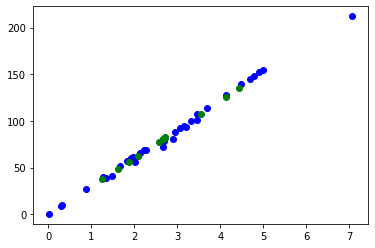

In [27]:
ax = plt.gca()
ax.scatter(d_train["zurich"].precipitation, d_train["zurich"].PM25, color="b")
ax.scatter(d_test["zurich"].precipitation, pred_2019["zurich"], color="green")
plt.show()

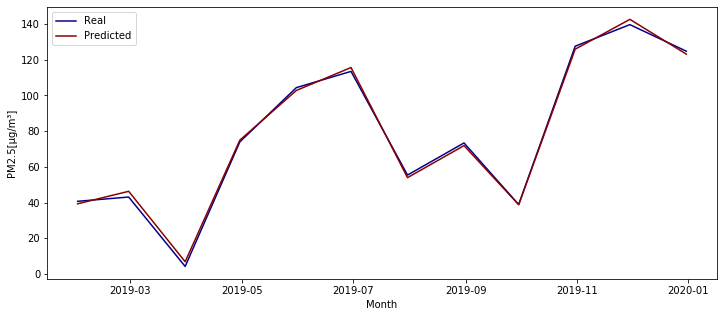

In [28]:
fig = plt.subplots(figsize=(12,5))
ax = plt.gca()
ax.plot(d_test["lausanne"].index, d_test["lausanne"].PM25, color="darkblue", label="Real")
ax.plot(d_test["lausanne"].index, pred_2019["lausanne"], color="darkred", label="Predicted")
ax.set_xlabel("Month")
ax.set_ylabel("PM2.5[µg/m³]")
ax.legend(loc='best')
plt.show()

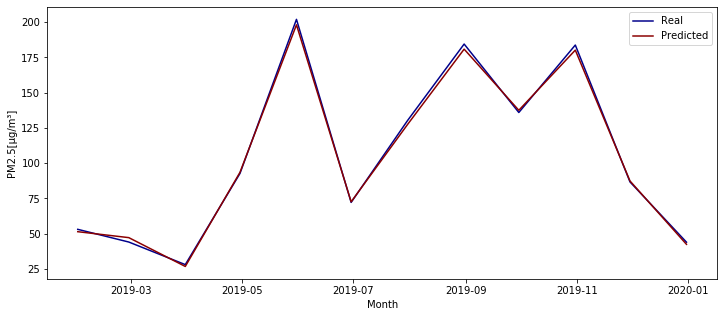

In [29]:
fig = plt.subplots(figsize=(12,5))
ax = plt.gca()
ax.plot(d_test["rigi"].index, d_test["rigi"].PM25, color="darkblue", label="Real")
ax.plot(d_test["rigi"].index, pred_2019["rigi"], color="darkred", label="Predicted")
ax.set_xlabel("Month")
ax.set_ylabel("PM2.5[µg/m³]")
ax.legend(loc='best')
plt.show()

In [30]:
d_2020_2021

{'bern':                  temp  precipitation   PM25
 date                                       
 2020-01-31   2.374194       1.335484   41.4
 2020-02-29   6.648276       3.517241  102.0
 2020-03-31   6.487097       1.874194   58.1
 2020-04-30  13.146667       2.156667   64.7
 2020-05-31  14.570968       2.703226   83.8
 2020-06-30  17.306667       4.613793  133.8
 2020-07-31  21.012903       2.445161   75.8
 2020-08-31  20.374194       4.806452  149.0
 2020-09-30  16.776667       2.879310   83.5
 2020-10-31   9.874194       4.096774  127.0
 2020-11-30   5.870000       1.176667   35.3
 2020-12-31   2.677419       2.545161   78.9
 2021-01-31   1.158065       4.209677  130.5
 2021-02-28   4.453571       1.521429   42.6
 2021-03-31   6.241935       2.038710   63.2
 2021-04-30   8.613333       1.403333   42.1
 2021-05-31  11.519355       4.380645  135.8
 2021-06-30  19.513333       6.580000  197.4
 2021-07-31  19.019355       7.551613  234.1
 2021-08-31  18.238710       2.612903   81.0
 2

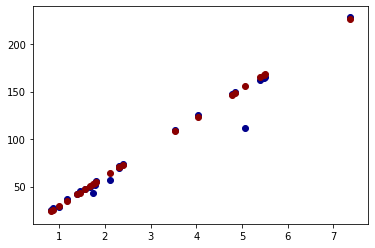

In [31]:
ax = plt.gca()
ax.scatter(d_2020_2021["lausanne"].precipitation, d_2020_2021["lausanne"].PM25, color="darkblue", label="Real")
ax.scatter(d_2020_2021["lausanne"].precipitation, pred_2020_2021["lausanne"], color="darkred", label="Predicted")
plt.show()

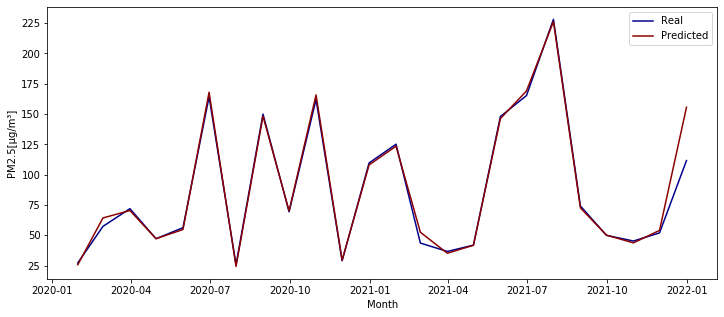

In [32]:
fig = plt.subplots(figsize=(12,5))
ax = plt.gca()
ax.plot(d_2020_2021["lausanne"].index, d_2020_2021["lausanne"].PM25, color="darkblue", label="Real")
ax.plot(d_2020_2021["lausanne"].index, pred_2020_2021["lausanne"],color="darkred", label="Predicted")
ax.set_xlabel("Month")
ax.set_ylabel("PM2.5[µg/m³]")
ax.legend(loc='best')
plt.show()

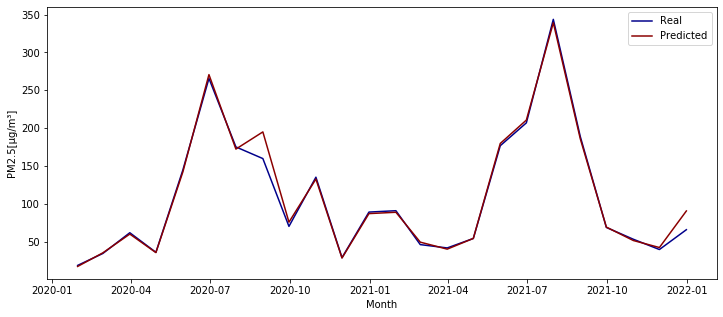

In [33]:
fig = plt.subplots(figsize=(12,5))
ax = plt.gca()
ax.plot(d_2020_2021["rigi"].index, d_2020_2021["rigi"].PM25, color="darkblue", label="Real")
ax.plot(d_2020_2021["rigi"].index, pred_2020_2021["rigi"],color="darkred", label="Predicted")
ax.set_xlabel("Month")
ax.set_ylabel("PM2.5[µg/m³]")
ax.legend(loc='best')
plt.show()

In [34]:
print(np.sqrt(mean_squared_error(d_2020_2021["rigi"]["PM25"], pred_2020_2021["rigi"])))
print(r2_score(d_2020_2021["rigi"]["PM25"], pred_2020_2021["rigi"]))

9.177760952142625
0.9875251115063378


In [35]:
d_2020_2021

{'bern':                  temp  precipitation   PM25
 date                                       
 2020-01-31   2.374194       1.335484   41.4
 2020-02-29   6.648276       3.517241  102.0
 2020-03-31   6.487097       1.874194   58.1
 2020-04-30  13.146667       2.156667   64.7
 2020-05-31  14.570968       2.703226   83.8
 2020-06-30  17.306667       4.613793  133.8
 2020-07-31  21.012903       2.445161   75.8
 2020-08-31  20.374194       4.806452  149.0
 2020-09-30  16.776667       2.879310   83.5
 2020-10-31   9.874194       4.096774  127.0
 2020-11-30   5.870000       1.176667   35.3
 2020-12-31   2.677419       2.545161   78.9
 2021-01-31   1.158065       4.209677  130.5
 2021-02-28   4.453571       1.521429   42.6
 2021-03-31   6.241935       2.038710   63.2
 2021-04-30   8.613333       1.403333   42.1
 2021-05-31  11.519355       4.380645  135.8
 2021-06-30  19.513333       6.580000  197.4
 2021-07-31  19.019355       7.551613  234.1
 2021-08-31  18.238710       2.612903   81.0
 2